In [1]:
import numpy as np
from catan import Catan, CatanException, get_random_dice_arrangement, Player, Game, simulate_1p_game, simulate_1p_game_with_data
import matplotlib.pyplot as plt
from itertools import repeat
import sys
%matplotlib inline

Drawing...


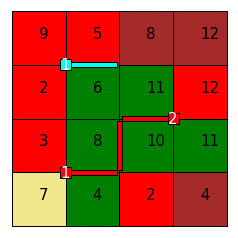

In [2]:
width, height = 4,4
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources, {6:0, 16:1}, {13:0}, {(6, 7):0, (7, 12):0, (12, 13):0, (16,17): 1})
board.register_player()
board.register_player()
board.draw()

In [3]:
def action(self):
    goal = determine_goal(board, self)
    
    if self.get_settlements() == []:
        (x,y) = (2, 2)
        self.buy("settlement", x, y) # we determined previously    
        print("bought settlement at " + "(" + str(x) + "," + str(y) + ")")         
    
    if goal == "settlement":
        (x, y) = self.preComp
        if self.board.get_vertex_number(x, y) in [v for road in self.get_roads() for v in road] :
            if self.if_can_buy("settlement"):
                self.buy("settlement", x, y)
                print("bought settlement at " + "(" + str(x) + "," + str(y) + ")") 
        elif len(self.get_settlements()) > 0 and self.if_can_buy("road"):
            (v0, v1) = optimal_road(self)
            self.buy("road", v0, v1)
            print("bought road " + str(v0) + str(v1))
        else:
            modified_trade(self, goal)

    elif goal == "city":
        if self.if_can_buy("city"):
            (x, y) = optimal_city(board)
            self.buy("city", x, y)
    elif goal == "card":
        if self.if_can_buy("card"):
            self.buy("card")
            print("bought card")   
        #trade policy
        else:
            modified_trade(self, goal)
            
    return

In [4]:
def determine_goal(board, self):
    buildings = ["settlement", "city", "card"]
    goal = "card"
    max_value = 0
    for building in buildings:
        time = hitting_time(board, building)
#         usefulness = determine_usefulness(board, building, self)
        usefulness = 0
        curr_value = 1/time + usefulness
        if curr_value > max_value:
            goal = building
            max_value = curr_value
    
    return goal

In [5]:
def hitting_time(board, building):
    if building == "settlement":
        return 5
    elif building == "card":
        return np.random.randint(1, 7)
    else:
        return 20

# def determine_usefulness(board, building, self):
    

In [6]:
def dumpPolicy(self, max_resources):
    new_resources = np.minimum(self.resources, max_resources // 3)
    return self.resources - new_resources

In [7]:
def optimal_settlement(baseBoard):
    # prefer middle of the board over edges
    x = np.random.randint(1, baseBoard.width)
    y = np.random.randint(1, baseBoard.height)
    optSettlementLoc = (x,y)
#     return optSettlementLoc
    return (1, 1)

In [8]:
def optimal_road(self):
    goal = self.preComp
    curr_settlements = self.get_settlements()
    curr_roads = self.get_roads()
    
    # find closest road or settlement
    closest = 0
    closest_dist = 500
    for s in curr_settlements:
        coordinates = self.board.get_vertex_location(s)
        dist = abs(goal[0] - coordinates[0]) + abs(goal[1] - coordinates[1])
        if dist < closest_dist:
            closest = s
            closest_dist = dist
    
    for r in curr_roads:
        for end in r:
            r_end = self.board.get_vertex_location(end)
            dist = abs(goal[0] - r_end[0]) + abs(goal[1] - r_end[1])
            if dist < closest_dist:
                closest = end
                closest_dist = dist
            

    hor = goal[0] - self.board.get_vertex_location(closest)[0]
    ver = goal[1] - self.board.get_vertex_location(closest)[1]    
    v2 = closest
    
    if abs(hor) >= abs(ver):
        if hor < 0:
            v2 -= 1
        elif hor > 0:
            v2 += 1
    else:
        if ver < 0:
            v2 -= 5
        else:
            v2 += 5
    
    return (self.board.get_vertex_location(closest), self.board.get_vertex_location(v2))

In [9]:
def optimal_city(self):
    x = np.random.randint(1, self.board.width)
    y = np.random.randint(1, self.board.height)
    optSettlementLoc = (x,y)
    return optSettlementLoc
    

In [ ]:
def modified_trade(self, goal):
    ports = [] #get list of ports and everything thats in it    

    for e in self.get_settlements():
        if self.board.is_port(e):
            ports.append(self.board.which_port(e))
    for e in self.get_cities():
        if self.board.is_port(e):
            ports.append(self.board.which_port(e))

    trade_away = -1 
    trade_for = -1
    curr_best = hitting_time(self.resources, goal) #find hitting time of current state
    trade = False
    subtract = 0 

    for i in range(len(self.resources)):
        required = 4 #start off needing 4 resources for each
        if i in ports: #seeing how many required to trade
            required = 2
        if 3 in ports:
            required = min(required, 3)
        if self.resources[i] >= required: #if have enough, try combinations of trading
            for j in range(len(self.resources)): 
                if i == j:
                    continue
                potential = self.resources[:]#added in to make a copy of actual resources
                potential[i] -= required #performs trade
                potenital[j] += 1
                new_time = hitting_time(potential, goal) #calculates new hitting time
                if new_time < curr_best:
                    curr_best = new_time 
                    trade_away = i
                    trade_for = j
                    trade = True
                    subtract = required
    if trade:
        self.resources[trade_away] -= subtract
        self.resources[trade_for] += 1

In [10]:
# def tile_usefulness():
    

In [11]:
settlements, cities, roads, hands, live_points, dice_rolls = simulate_1p_game_with_data(action, dumpPolicy, optimal_settlement, board)

def draw(t):
    t = int(t)
    live_board = Catan(board.dice, board.resources, [], [])
    live_board.settlements = settlements[t]
    live_board.cities = cities[t]
    live_board.roads = roads[t]
    print("turn:", t)
    print("points:", live_points[t])
    print("dice roll:", dice_rolls[t])
    print("resources:", hands[t])
    live_board.draw()

bought settlement at (2,2)
bought road (2, 2)(1, 2)
bought road (1, 2)(1, 1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought card
bought card
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card


In [12]:
from ipywidgets import *
interact(draw, t=(0, len(live_points) - 1, 1))

interactive(children=(IntSlider(value=81, description='t', max=162), Output()), _dom_classes=('widget-interact…

<function __main__.draw(t)>

Drawing...
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


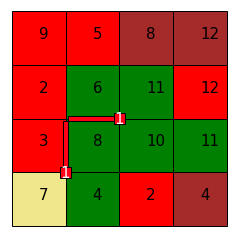

In [13]:
board.draw()
print(board.get_resources())

# wood is brown, brick is red, grain is green 
# below is the resource outcome of a dice roll 2-12

In [14]:
RESOURCE_SCORES = {0: 4/17, 1: 7/17, 2: 6/17, -1: 0}  ## MAKE SURE THESE ARE RIGHT. SHOULD BE WOOD BRICK GRAIN
RESOURCE_WEIGHT = 7 # FOR TESTING
DICE_SCORES = {2: 1/15, 12: 1/15, 3: 2/15, 11: 2/15, 4: 3/15, 10: 3/15, 5: 4/15, 9: 4/15, 6: 5/15, 8: 5/15, 7: 0}
DICE_WEIGHT = 15 # FOR TESTING


# Returns 2D array of board scores
def make_board_scores(board):
    scoreboard = [[] for _ in range(len(board.dice))]
    for i in range(len(board.dice)):
        for j in range(len(board.dice[0])):
            calculate_tile_score
            scoreboard[i].append(calculate_tile_score(board, i, j))
            
    return np.array(scoreboard)

# Calculate the score of tile i, j on the board
def calculate_tile_score(board, i, j):
    resource_score = RESOURCE_SCORES[board.resources[i][j]]
    dice_score = DICE_SCORES[board.dice[i][j]]
    
    return resource_score * RESOURCE_WEIGHT + dice_score * DICE_WEIGHT


def make_settlement_scores(board, board_scores):
    scoreboard = [[] for _ in range(len(board.dice) + 1)]
    
    for i in range(len(scoreboard)):
        for j in range(len(board.dice[0]) + 1):
            scoreboard[i].append(get_settlement_score(board, board_scores, i, j))
    return np.array(scoreboard)

def get_settlement_score(board, board_scores, i, j):
    PORT_WEIGHT = .5
    if i == 0 or i == len(board_scores):
        if i == len(board_scores):  # To make indices line up
            i -= 1
            
        if j == 0:
            return board_scores[i][j] + PORT_WEIGHT
        elif j == len(board_scores[0]):
            return board_scores[i][j-1] + PORT_WEIGHT
        else:
            return board_scores[i][j] + board_scores[i][j-1]
    elif j == 0 or j == len(board_scores[0]):
        if j == len(board_scores[0]): # To make indices line up
            j -= 1
            
        if i == len(board_scores):
            return board_scores[i-1][j] + PORT_WEIGHT
        else:
            return board_scores[i-1][j] + board_scores[i][j]
    elif i == len(board_scores) and j == len(board_scores[0]):
        return board_scores[i-1][j-1] + PORT_WEIGHT
    else:
        return board_scores[j][i] + board_scores[j-1][i] + board_scores[j][i-1] + board_scores[j-1][i-1]
        

board_scores = make_board_scores(board)
print(board_scores)
settlement_scores = make_settlement_scores(board, board_scores)
print(settlement_scores)

[[0.         5.47058824 3.88235294 4.64705882]
 [4.88235294 7.47058824 5.47058824 4.47058824]
 [3.88235294 7.47058824 4.47058824 3.88235294]
 [6.88235294 6.88235294 6.64705882 2.64705882]]
[[ 0.5         5.47058824  9.35294118  8.52941176  5.14705882]
 [ 4.88235294 17.82352941 23.70588235 25.11764706  9.11764706]
 [ 8.76470588 22.29411765 24.88235294 25.47058824  8.35294118]
 [10.76470588 18.47058824 18.29411765 17.64705882  6.52941176]
 [ 7.38235294 13.76470588 13.52941176  9.29411765  3.14705882]]


In [15]:
num_trials = 3

width, height = 4, 4
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources)
print("average turns to win: {}".format(simulate_1p_game(action, dumpPolicy, optimal_settlement, board, num_trials)))

bought settlement at (2,2)
bought road (2, 2)(1, 2)
bought road (1, 2)(1, 1)
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought settlement at (1,1)
bought card
bought settlement at (2,2)
bought road (2, 2)(1, 2)
bought road (1, 2)(1, 1)
bought card
bought se